<a href="https://colab.research.google.com/github/shweta-aiml/100daysofcode/blob/master/TextIdentificationFromImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install numpy
!pip3 install pillow
!pip3 install scipy
!pip3 install imageio
!pip3 install selective-search
!pip3 install pytesseract


  Created wheel for pytesseract: filename=pytesseract-0.3.4-py2.py3-none-any.whl size=13431 sha256=01d2183c456a5c287809d08d9f03dcfbdc5344ad36ba38f63f996f88c3fc781b
  Stored in directory: /root/.cache/pip/wheels/63/2a/a0/7596d2e0a73cf0aeffd6f6170862c4e73f3763b7827e48691a
Successfully built pytesseract


In [3]:
!apt install tesseract-ocr
!apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 31 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,062 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 144433 files and directories currently installed.)
Preparing to unpack .../tesserac

In [4]:
!pip install Pillow
!pip install pytesseract

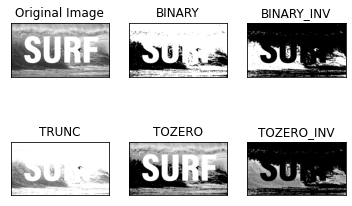

In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/SURF.jpg',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    print(pytesseract.image_to_string(images[i]))

plt.show()

In [11]:
import cv2

img_cv = cv2.imread('/content/SURF.jpg')

# By default OpenCV stores images in BGR format and since pytesseract assumes RGB format,
# we need to convert from BGR to RGB format/mode:
img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
print(pytesseract.image_to_string(img_rgb))
# OR
img_rgb = Image.frombytes('RGB', img_cv.shape[:2], img_cv, 'raw', 'BGR', 0, 0)
print(pytesseract.image_to_string(img_rgb))

In [0]:
#https://nanonets.com/blog/ocr-with-tesseract/
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('/content/invoice-sample.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())
s = pytesseract.image_to_string(img)
print(s)

In [19]:
!pip install tesseract

     |████████████████████████████████| 45.6MB 89kB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-cp36-none-any.whl size=45562571 sha256=dbb5d0ba620710c6639e5e8b5167c4fa85c53fc82a383e835fa73efd67435cc2
  Stored in directory: /root/.cache/pip/wheels/82/1f/d9/24797b123379e4ea9511cf660835468b62dad609634cad2aba
Successfully built tesseract


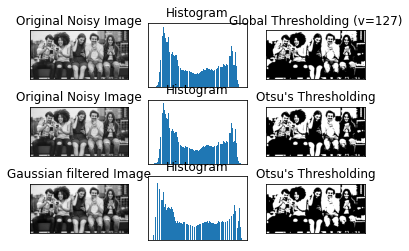

In [26]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/peoplewithphone.jpeg',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [0]:
def get_string(img_path):
    # Read image with opencv
    img = cv2.imread(img_path)

    # Convert to gray
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    # Apply dilation and erosion to remove some noise
    kernel = np.ones((7, 6), np.uint8)
    print(kernel)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)

    # Write image after removed noise
    cv2.imwrite("/content/RemovedNoise.jpg", img)

    # Write the image after apply opencv to do some
    cv2.imwrite('/content/SampleProcess.jpg', img)
    
    # Recognize text with tesseract for python
    result = pytesseract.image_to_string(img)

    # Writing Result into text file 
    file = open("/content/TextExtract.txt","w") 
    file.write(result)
    file.close()

    return result

In [0]:
def ReadTextFromImage(img_path):
    # Read
    src_path = '/content/'
    img = cv2.imread(img_path)
    #convert it to grey color
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # apply dilation and erosion to remove noise
    kernel = np.ones((2, 2), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)

    cv2.imwrite(src_path + "removed_noise.png", img)
    # threshold 
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    cv2.imwrite(src_path + "thres.png", img)
    result = pytesseract.image_to_string(Image.open(src_path + "thres.png"))
    
    return result

In [70]:
print(ReadTextFromImage('/content/Img1.png'))

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.


In [69]:
print(ReadTextFromImage('/content/Img2.jpg'))

coo!
HAS IT
GOT TEXT
.| MESSAGING
AND
TWITTER? jd
yt

i 3
6
te eo”
a FD
A


In [67]:
print(ReadTextFromImage('/content/Img3.jpg'))

HOW TO
CLASIFY?
